# Loading Data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use("seaborn-v0_8-whitegrid")
palette = sns.color_palette('Set2')
sns.set_palette(palette)

In [52]:
Employee = pd.read_csv("Data.csv")

# Example: columns and how many values you want to null
null_counts = {
    'Age': 4000,
    'Years at Company': 8000,
    'Job Role': 2500,
    'Monthly Income': 5080,
    'Work-Life Balance': 6000,
    'Job Satisfaction': 4500,
    'Performance Rating': 3340,
    'Number of Dependents': 3500,
    'Job Level': 2607,
    'Company Size': 5500,
    'Company Tenure': 7000,
    'Remote Work': 2800,
    'Leadership Opportunities': 7200,
    'Innovation Opportunities': 3700,
    'Company Reputation': 4100,
    'Employee Recognition': 3900
}

# Loop through and randomly set NaN
for col, n_nulls in null_counts.items():
    # Randomly choose n_nulls unique indices
    indices = np.random.choice(Employee.index, size=n_nulls, replace=False)
    # Set those rows to NaN in this column
    Employee.loc[indices, col] = np.nan

# Check how many nulls now
print(Employee.isnull().sum())


Age                         4000
Gender                         0
Years at Company            8000
Job Role                    2500
Monthly Income              5080
Work-Life Balance           6000
Job Satisfaction            4500
Performance Rating          3340
Number of Promotions           0
Overtime                       0
Distance from Home             0
Education Level                0
Marital Status                 0
Number of Dependents        3500
Job Level                   2607
Company Size                5500
Company Tenure              7000
Remote Work                 2800
Leadership Opportunities    7200
Innovation Opportunities    3700
Company Reputation          4100
Employee Recognition        3900
Attrition                      0
dtype: int64


# Exploring Data

In [53]:
Employee.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31.0,Male,19.0,Education,5390.0,Excellent,NaN,NaN,2,No,...,0.0,Mid,NaN,89.0,No,No,No,Excellent,Medium,Stayed
1,59.0,Female,4.0,Media,5534.0,Poor,High,Low,3,No,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24.0,Female,10.0,Healthcare,8159.0,Good,High,Low,0,No,...,3.0,Mid,Medium,NaN,No,No,No,Poor,Low,Stayed
3,36.0,Female,7.0,Education,3989.0,Good,High,High,1,No,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56.0,Male,41.0,Education,4821.0,Fair,Very High,Average,0,Yes,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [54]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       70498 non-null  float64
 1   Gender                    74498 non-null  object 
 2   Years at Company          66498 non-null  float64
 3   Job Role                  71998 non-null  object 
 4   Monthly Income            69418 non-null  float64
 5   Work-Life Balance         68498 non-null  object 
 6   Job Satisfaction          69998 non-null  object 
 7   Performance Rating        71158 non-null  object 
 8   Number of Promotions      74498 non-null  int64  
 9   Overtime                  74498 non-null  object 
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74498 non-null  object 
 12  Marital Status            74498 non-null  object 
 13  Number of Dependents      70998 non-null  float64
 14  Job Le

In [55]:
Employee.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,70498.000000,66498.000000,69418.000000,74498.000000,74498.000000,70998.000000,67498.000000
mean,38.500709,15.706006,7299.882293,0.832935,49.991584,1.651610,55.740392
std,12.093549,11.224181,2152.975854,0.995289,28.513611,1.553854,25.382157
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,38.000000,13.000000,7350.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [56]:
Employee.describe(include='object')

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74498,71998,68498,69998,71158,74498,74498,74498,71891,68998,71698,67298,70798,70398,70598,74498
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,40826,18666,25914,34942,42682,50157,22331,37419,28722,34406,58083,63982,59279,35218,28053,39128


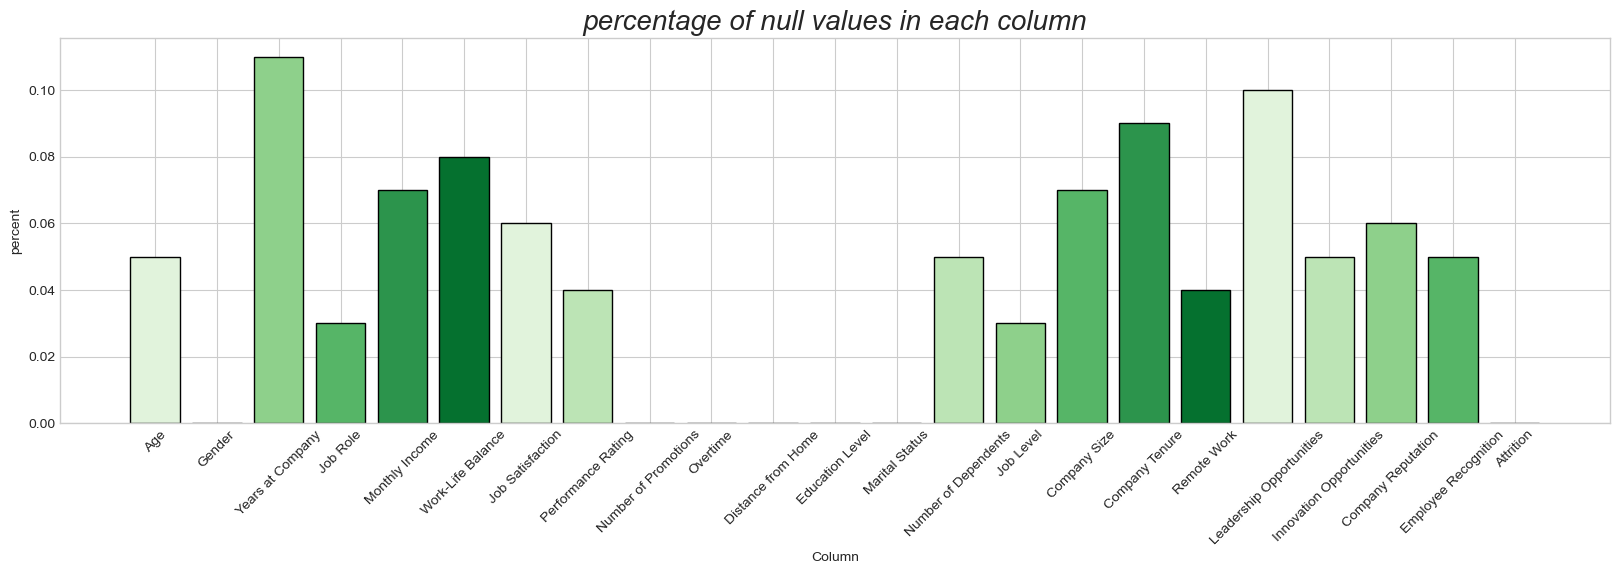

In [57]:
def df_maker(ser, cols):
    ret = pd.DataFrame(ser).reset_index()
    ret.columns = cols
    return ret

nulls = df_maker(Employee.isna().sum(), ['Column', 'number of null values'])
nulls['percent'] = round(nulls['number of null values'] / Employee.shape[0], 2)


def bar_disp(df, cols, title, size):
    plt.figure(figsize=size)
    ax = plt.axes()
    plt.bar(df[cols[0]], df[cols[1]],
            color=sns.color_palette('Greens'), edgecolor='k')
    plt.xticks(rotation=45)
    ax.set_title(title, style='oblique', fontdict={'size':20})
    ax.set(xlabel=cols[0], ylabel=cols[1])

# bar_disp(nulls, ['Column', 'number of null values'], title='number of null values in each column', size=(20, 5))
bar_disp(nulls, ['Column', 'percent'], title='percentage of null values in each column', size=(20, 5))

In [58]:
Employee.duplicated().sum()

0

# Basic Cleaning

### Age

In [59]:
Employee[['Age']].describe()

,Age
count,70498.000000
mean,38.500709
std,12.093549
min,18.000000
25%,28.000000
50%,38.000000
75%,49.000000
max,59.000000


### Gender

In [60]:
Employee['Gender'].value_counts()

Gender
Male      40826
Female    33672
Name: count, dtype: int64

### Years at Company

In [61]:
Employee[['Years at Company']].describe()

,Years at Company
count,66498.000000
mean,15.706006
std,11.224181
min,1.000000
25%,7.000000
50%,13.000000
75%,23.000000
max,51.000000


### Job Role

In [62]:
Employee['Job Role'].value_counts()

Job Role
Technology    18666
Healthcare    16509
Education     15095
Media         11616
Finance       10112
Name: count, dtype: int64

### Monthly Income

In [63]:
Employee['Monthly Income'].describe()

count    69418.000000
mean      7299.882293
std       2152.975854
min       1226.000000
25%       5652.000000
50%       7350.000000
75%       8876.000000
max      16149.000000
Name: Monthly Income, dtype: float64

In [64]:
Employee['Monthly Income'] = pd.to_numeric(Employee['Monthly Income'], errors='coerce').apply(lambda x: np.round(x, 2))

In [65]:
Employee['Monthly Income'].describe()

count    69418.000000
mean      7299.882293
std       2152.975854
min       1226.000000
25%       5652.000000
50%       7350.000000
75%       8876.000000
max      16149.000000
Name: Monthly Income, dtype: float64

### Work-Life Balance

In [66]:
Employee['Work-Life Balance'].value_counts()

Work-Life Balance
Good         25914
Fair         20698
Excellent    12412
Poor          9474
Name: count, dtype: int64

In [67]:
Employee = Employee.loc[(Employee['Work-Life Balance'] != 'Media')]

### Job Satisfaction

In [68]:
Employee['Job Satisfaction'].value_counts()

Job Satisfaction
High         34942
Very High    14203
Medium       13842
Low           7011
Name: count, dtype: int64

### Performance Rating

In [69]:
Employee['Performance Rating'].value_counts()

Performance Rating
Average          42682
High             14252
Below Average    10654
Low               3570
Name: count, dtype: int64

### Number of Promotions

In [70]:
Employee['Number of Promotions'].describe()

count    74498.000000
mean         0.832935
std          0.995289
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: Number of Promotions, dtype: float64

### Overtime

In [71]:
Employee['Overtime'].value_counts()

Overtime
No     50157
Yes    24341
Name: count, dtype: int64

### Distance from Home

In [72]:
Employee['Distance from Home'].describe()

count    74498.000000
mean        49.991584
std         28.513611
min          1.000000
25%         25.000000
50%         50.000000
75%         75.000000
max         99.000000
Name: Distance from Home, dtype: float64

### Education Level

In [73]:
Employee['Education Level'].value_counts()

Education Level
Bachelor’s Degree    22331
Associate Degree     18649
Master’s Degree      15021
High School          14680
PhD                   3817
Name: count, dtype: int64

### Marital Status

In [74]:
Employee['Marital Status'].value_counts()

Marital Status
Married     37419
Single      26001
Divorced    11078
Name: count, dtype: int64

### Number of Dependents

In [75]:
Employee['Number of Dependents'].value_counts()

Number of Dependents
0.0    21165
1.0    18462
2.0    10601
3.0     9872
4.0     7262
5.0     2883
6.0      753
Name: count, dtype: int64

In [76]:
Employee['Number of Dependents'] = pd.to_numeric(Employee['Number of Dependents'], errors='coerce')
Employee['Number of Dependents'].describe()

count    70998.000000
mean         1.651610
std          1.553854
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          6.000000
Name: Number of Dependents, dtype: float64

### Job Level

In [77]:
Employee['Job Level'].value_counts()

Job Level
Entry     28722
Mid       28650
Senior    14519
Name: count, dtype: int64

### Company Size

In [78]:
Employee['Company Size'].value_counts()

Company Size
Medium    34406
Small     20783
Large     13809
Name: count, dtype: int64

### Company Tenure

In [79]:
Employee['Company Tenure'].describe()

count    67498.000000
mean        55.740392
std         25.382157
min          2.000000
25%         36.000000
50%         56.000000
75%         76.000000
max        128.000000
Name: Company Tenure, dtype: float64

### Remote Work

In [80]:
Employee['Remote Work'].value_counts()

Remote Work
No     58083
Yes    13615
Name: count, dtype: int64

### Leadership Opportunities

In [81]:
Employee['Leadership Opportunities'].value_counts()

Leadership Opportunities
No     63982
Yes     3316
Name: count, dtype: int64

### Innovation Opportunities

In [82]:
Employee['Innovation Opportunities'].value_counts()

Innovation Opportunities
No     59279
Yes    11519
Name: count, dtype: int64

### Company Reputation

In [83]:
Employee['Company Reputation'].value_counts()

Company Reputation
Good         35218
Poor         14247
Fair         13953
Excellent     6980
Name: count, dtype: int64

### Employee Recognition

In [84]:
Employee['Employee Recognition'].value_counts()

Employee Recognition
Low          28053
Medium       21493
High         17569
Very High     3483
Name: count, dtype: int64

### Attrition

In [85]:
Employee['Attrition'].value_counts()

Attrition
Stayed    39128
Left      35370
Name: count, dtype: int64

# Handling Outliers

In [86]:
num_cols = Employee.select_dtypes('number').columns
def outlier_killer(df, cols):
    for col in cols:
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        iqr = q3 - q1
        lb, ub = q1-1.5*iqr, q3+1.5*iqr
        filt = (df[col] < lb) | (df[col] > ub)
        df.loc[filt, col] = np.nan
    return df

Employee = outlier_killer(Employee, num_cols)

# EDA

### Categories

In [87]:
cat_df = Employee.select_dtypes('object')
cat_df.columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [88]:
cat_df.shape

(74498, 16)

In [89]:
def pie_plotter(df):
    cols = df.columns
    fig, ax = plt.subplots(4, 4, figsize=(15, 20))
    ax = ax.flatten()
    for i in range(df.shape[1]):
        count = df[cols[i]].value_counts()
        ax[i].pie(count.values,labels=count.index,
                autopct='%.2f%%',colors=palette, shadow=True)
        ax[i].set_title(f'{cols[i]} Distribution', style='oblique', fontdict={'size':15})
    plt.tight_layout()
    plt.show()

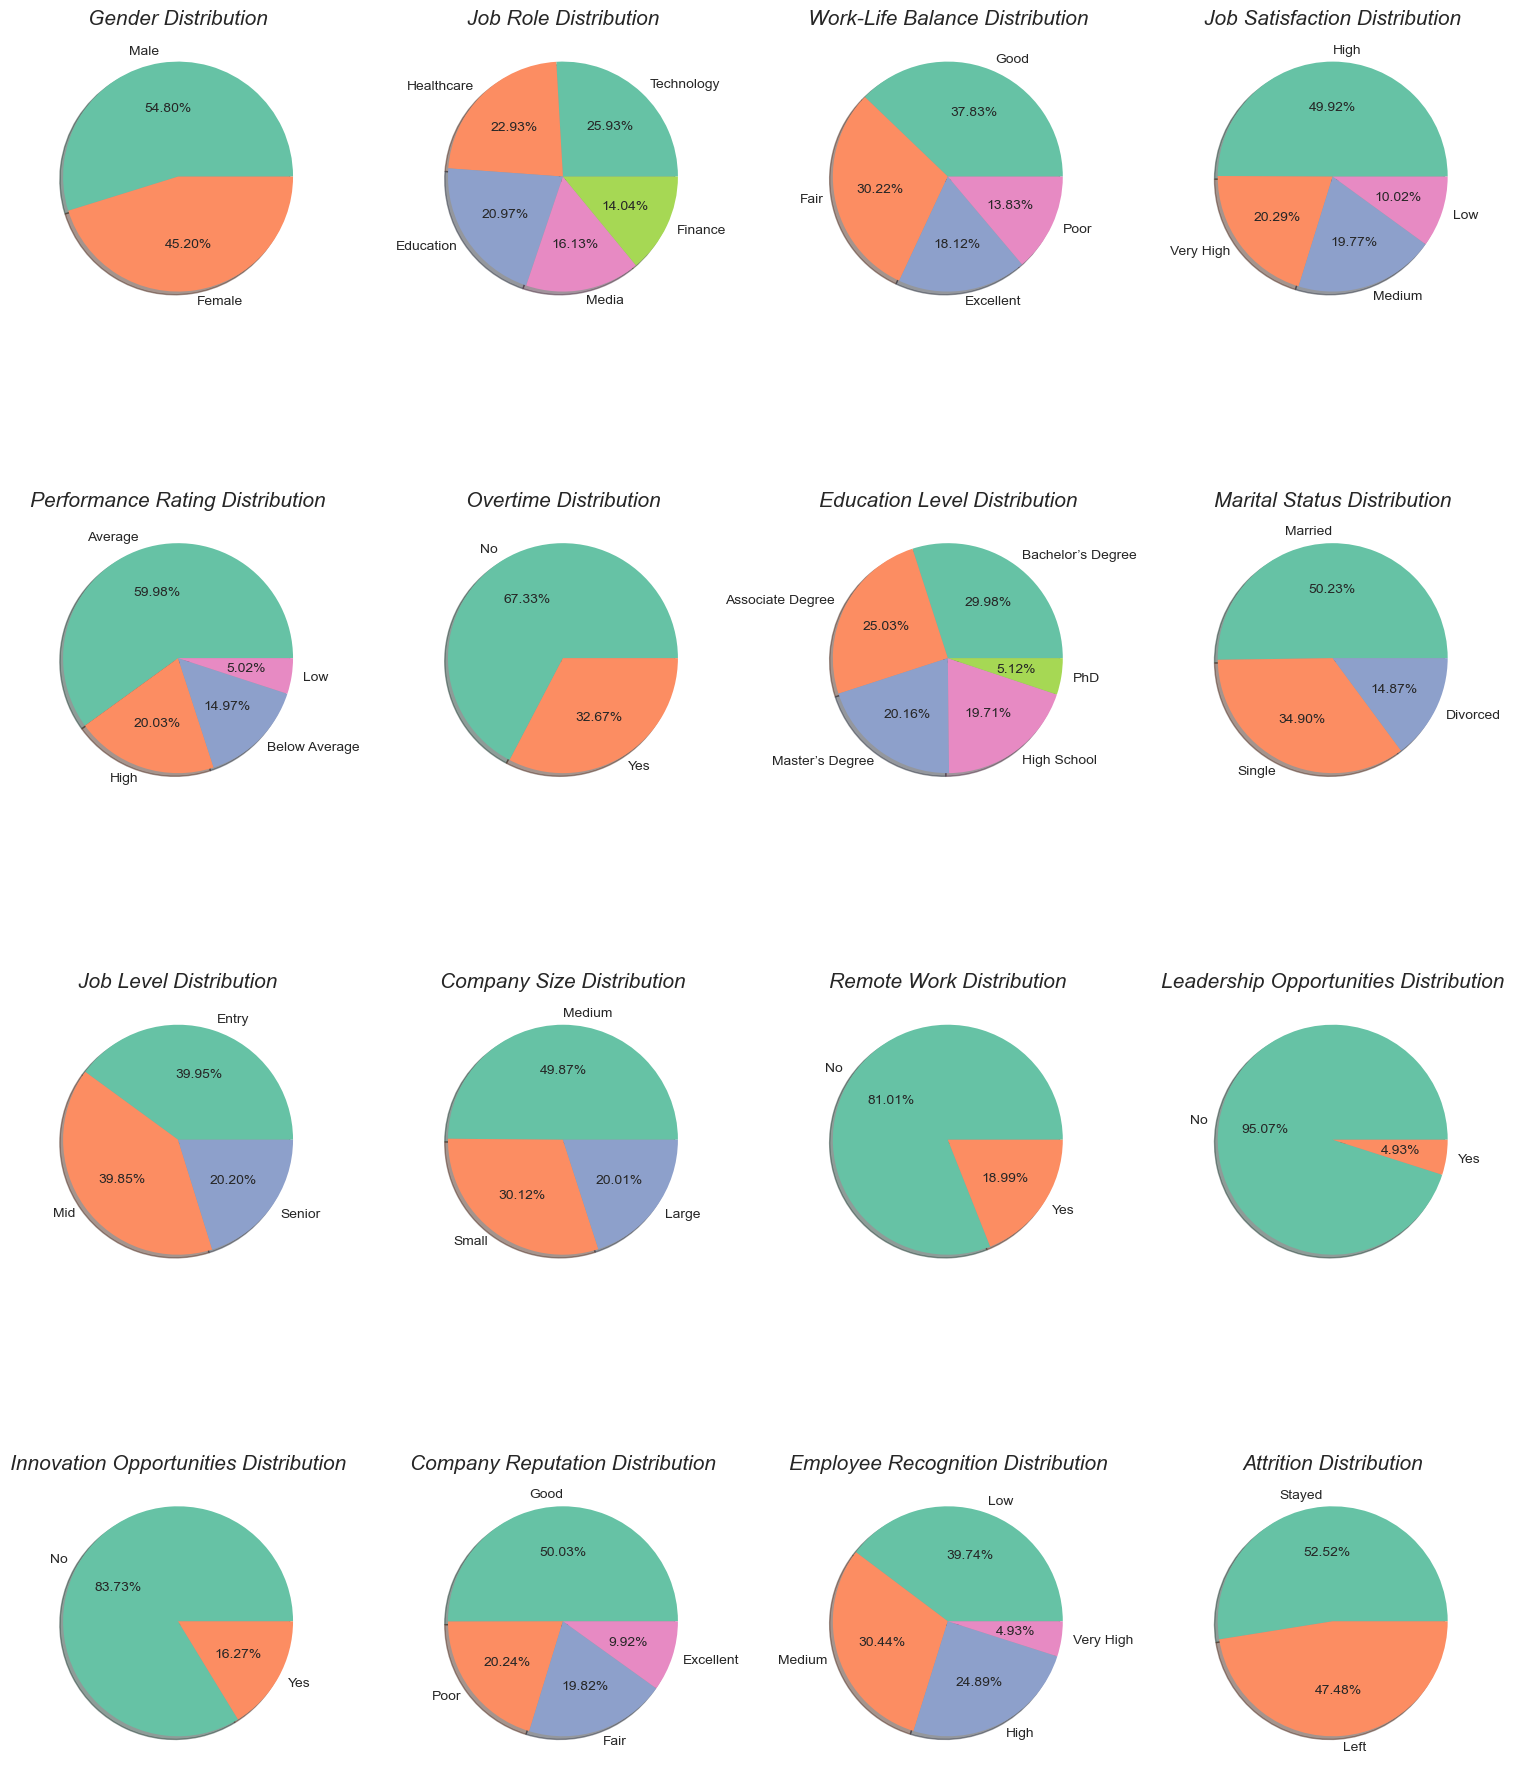

In [90]:
pie_plotter(cat_df)

In [91]:
def cat_vs_label(df):
    cols = cat_df.columns[:-1]

    fig, ax = plt.subplots(len(cols), 1, figsize=(10, 60))
    ax = ax.flatten()
    for i in range(len(cols)):
        sns.countplot(df, x=cols[i], hue='Attrition',
                      edgecolor='k', ax=ax[i])
        ax[i].set_title(f'{cols[i]} according to Attrition',
                        style='oblique', fontdict={'size':16})
    plt.tight_layout()
    plt.show()

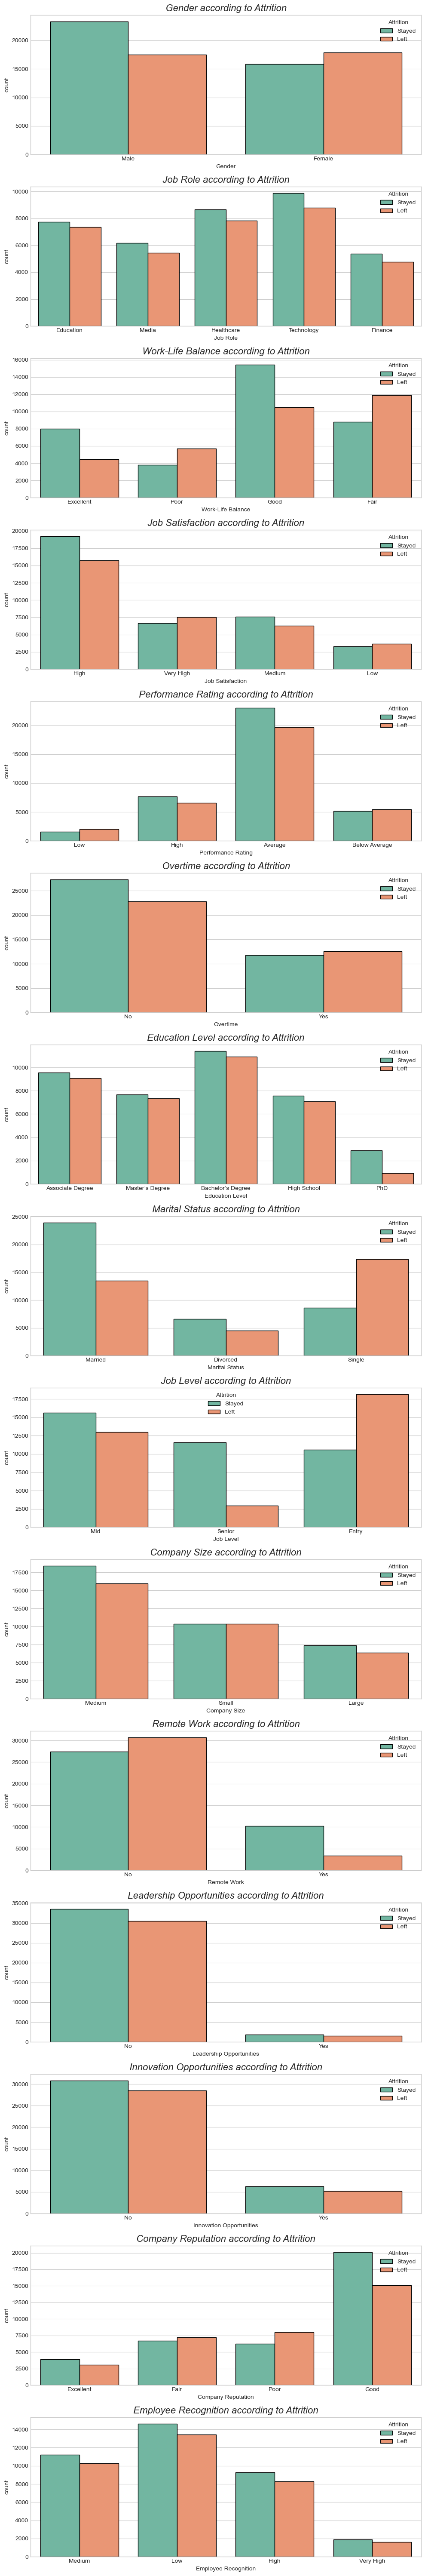

In [92]:
cat_vs_label(cat_df)

In [93]:
def dist_disp(df):
    cols = df.columns
    for col in cols:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax = ax.flatten()
        sns.boxplot(data=df, y=col, ax=ax[0])
        sns.boxenplot(data=df, x=col, ax=ax[1])
        sns.histplot(data=df, x=col, bins=12,
                    kde=True, alpha=0.8, ax=ax[2])

        plt.suptitle(f"{col} Distribution", fontsize=25)
        plt.tight_layout()
        plt.show()

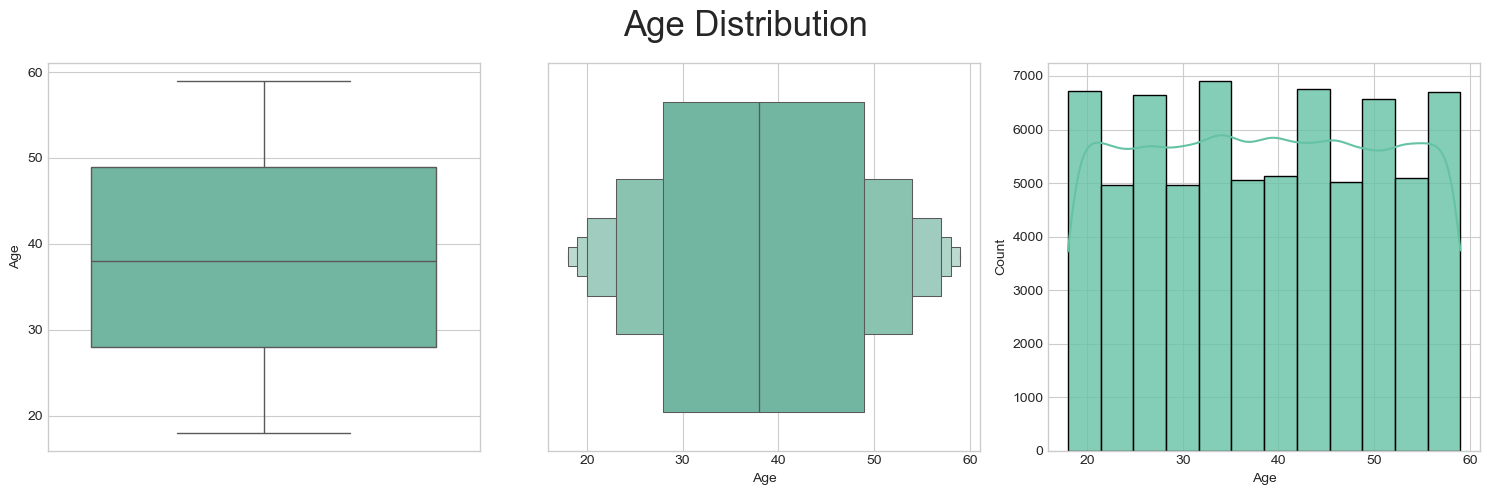

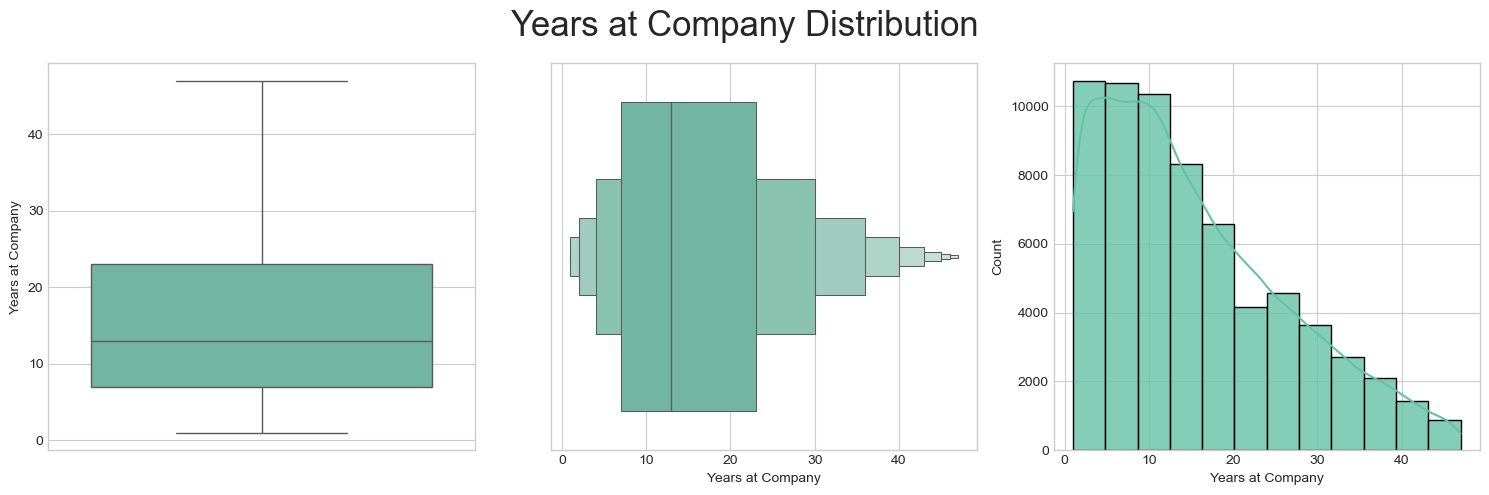

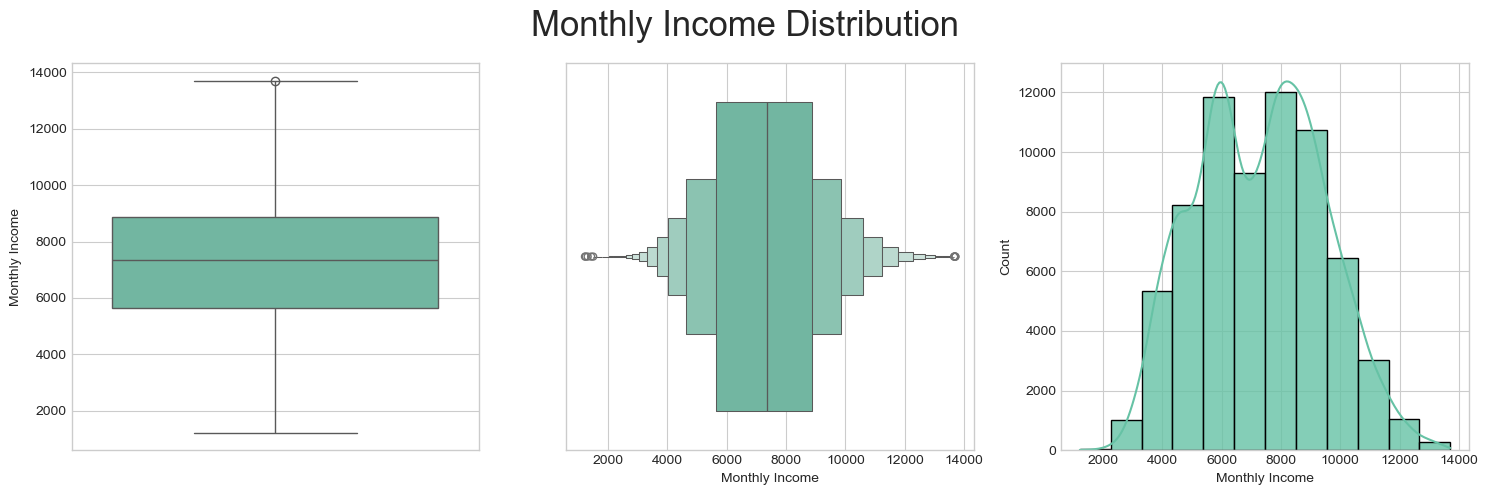

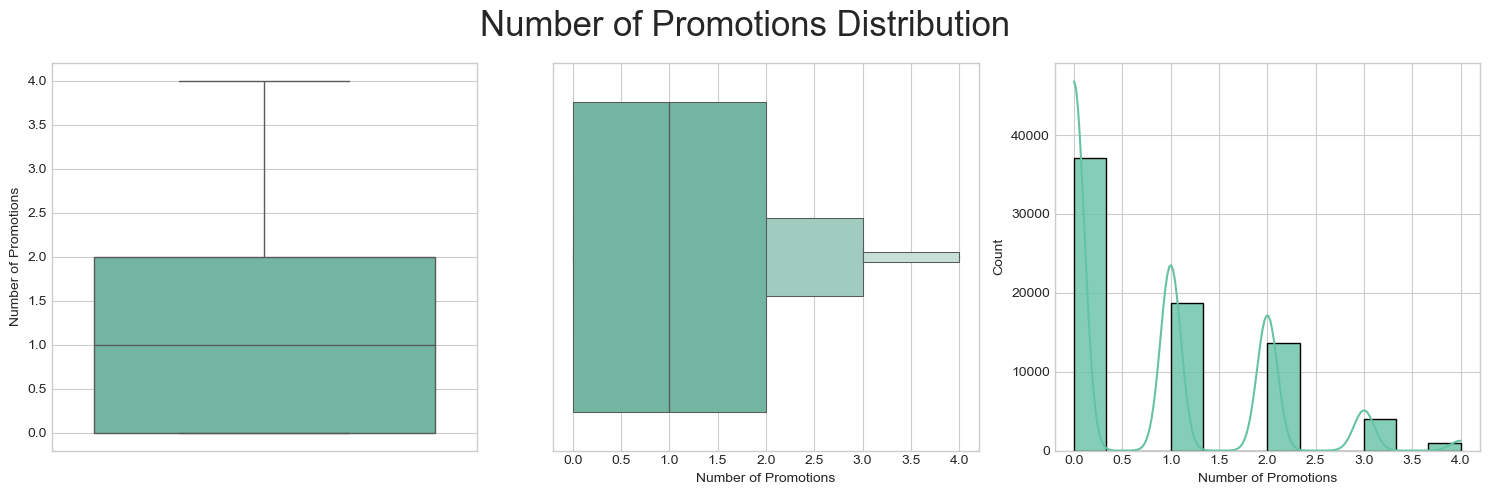

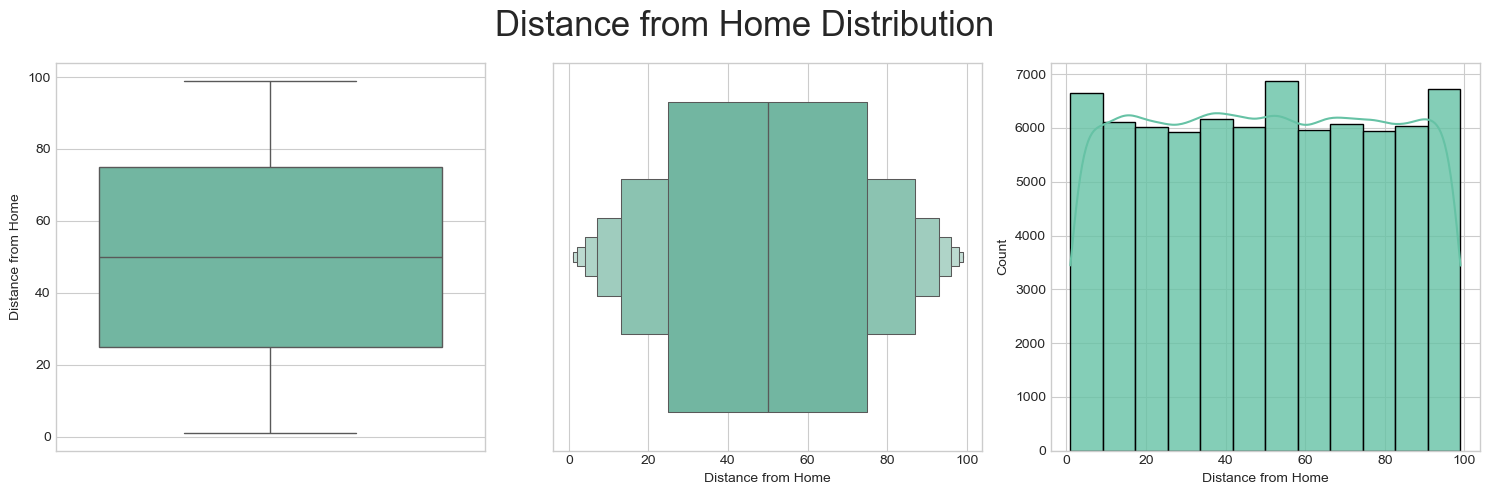

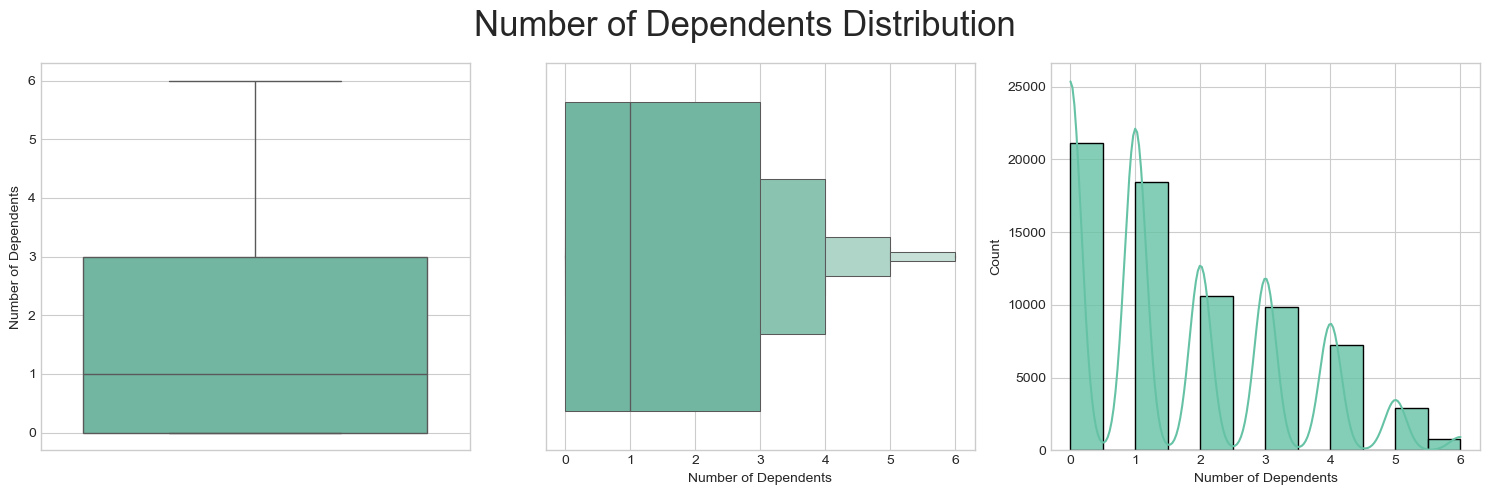

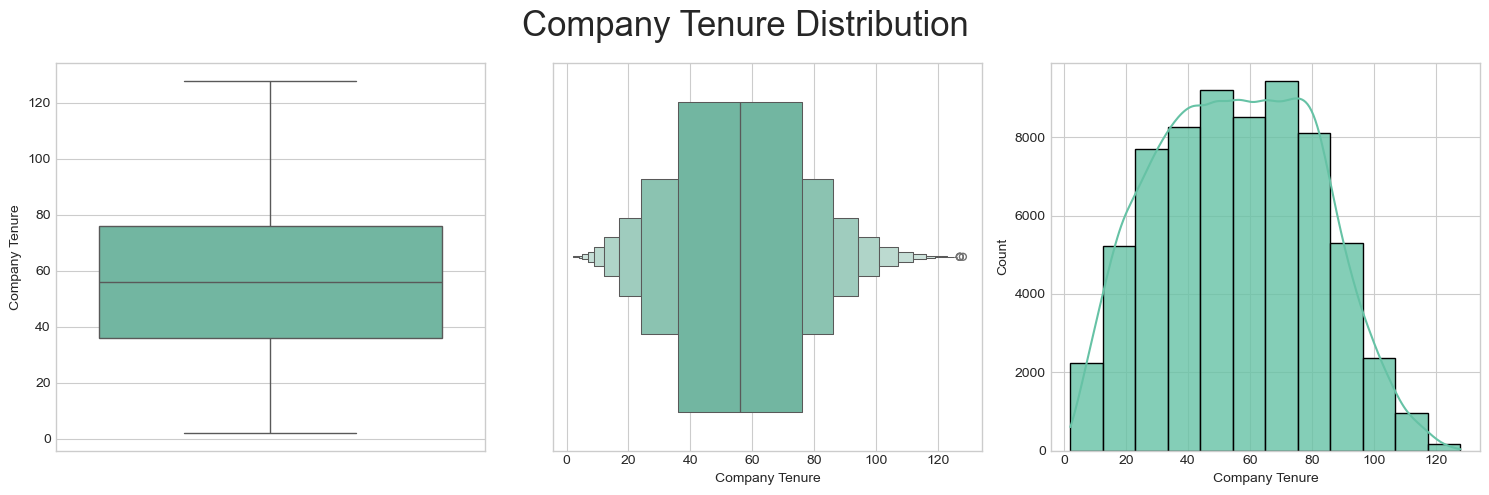

In [94]:
num_df = Employee.select_dtypes('number')
dist_disp(num_df)

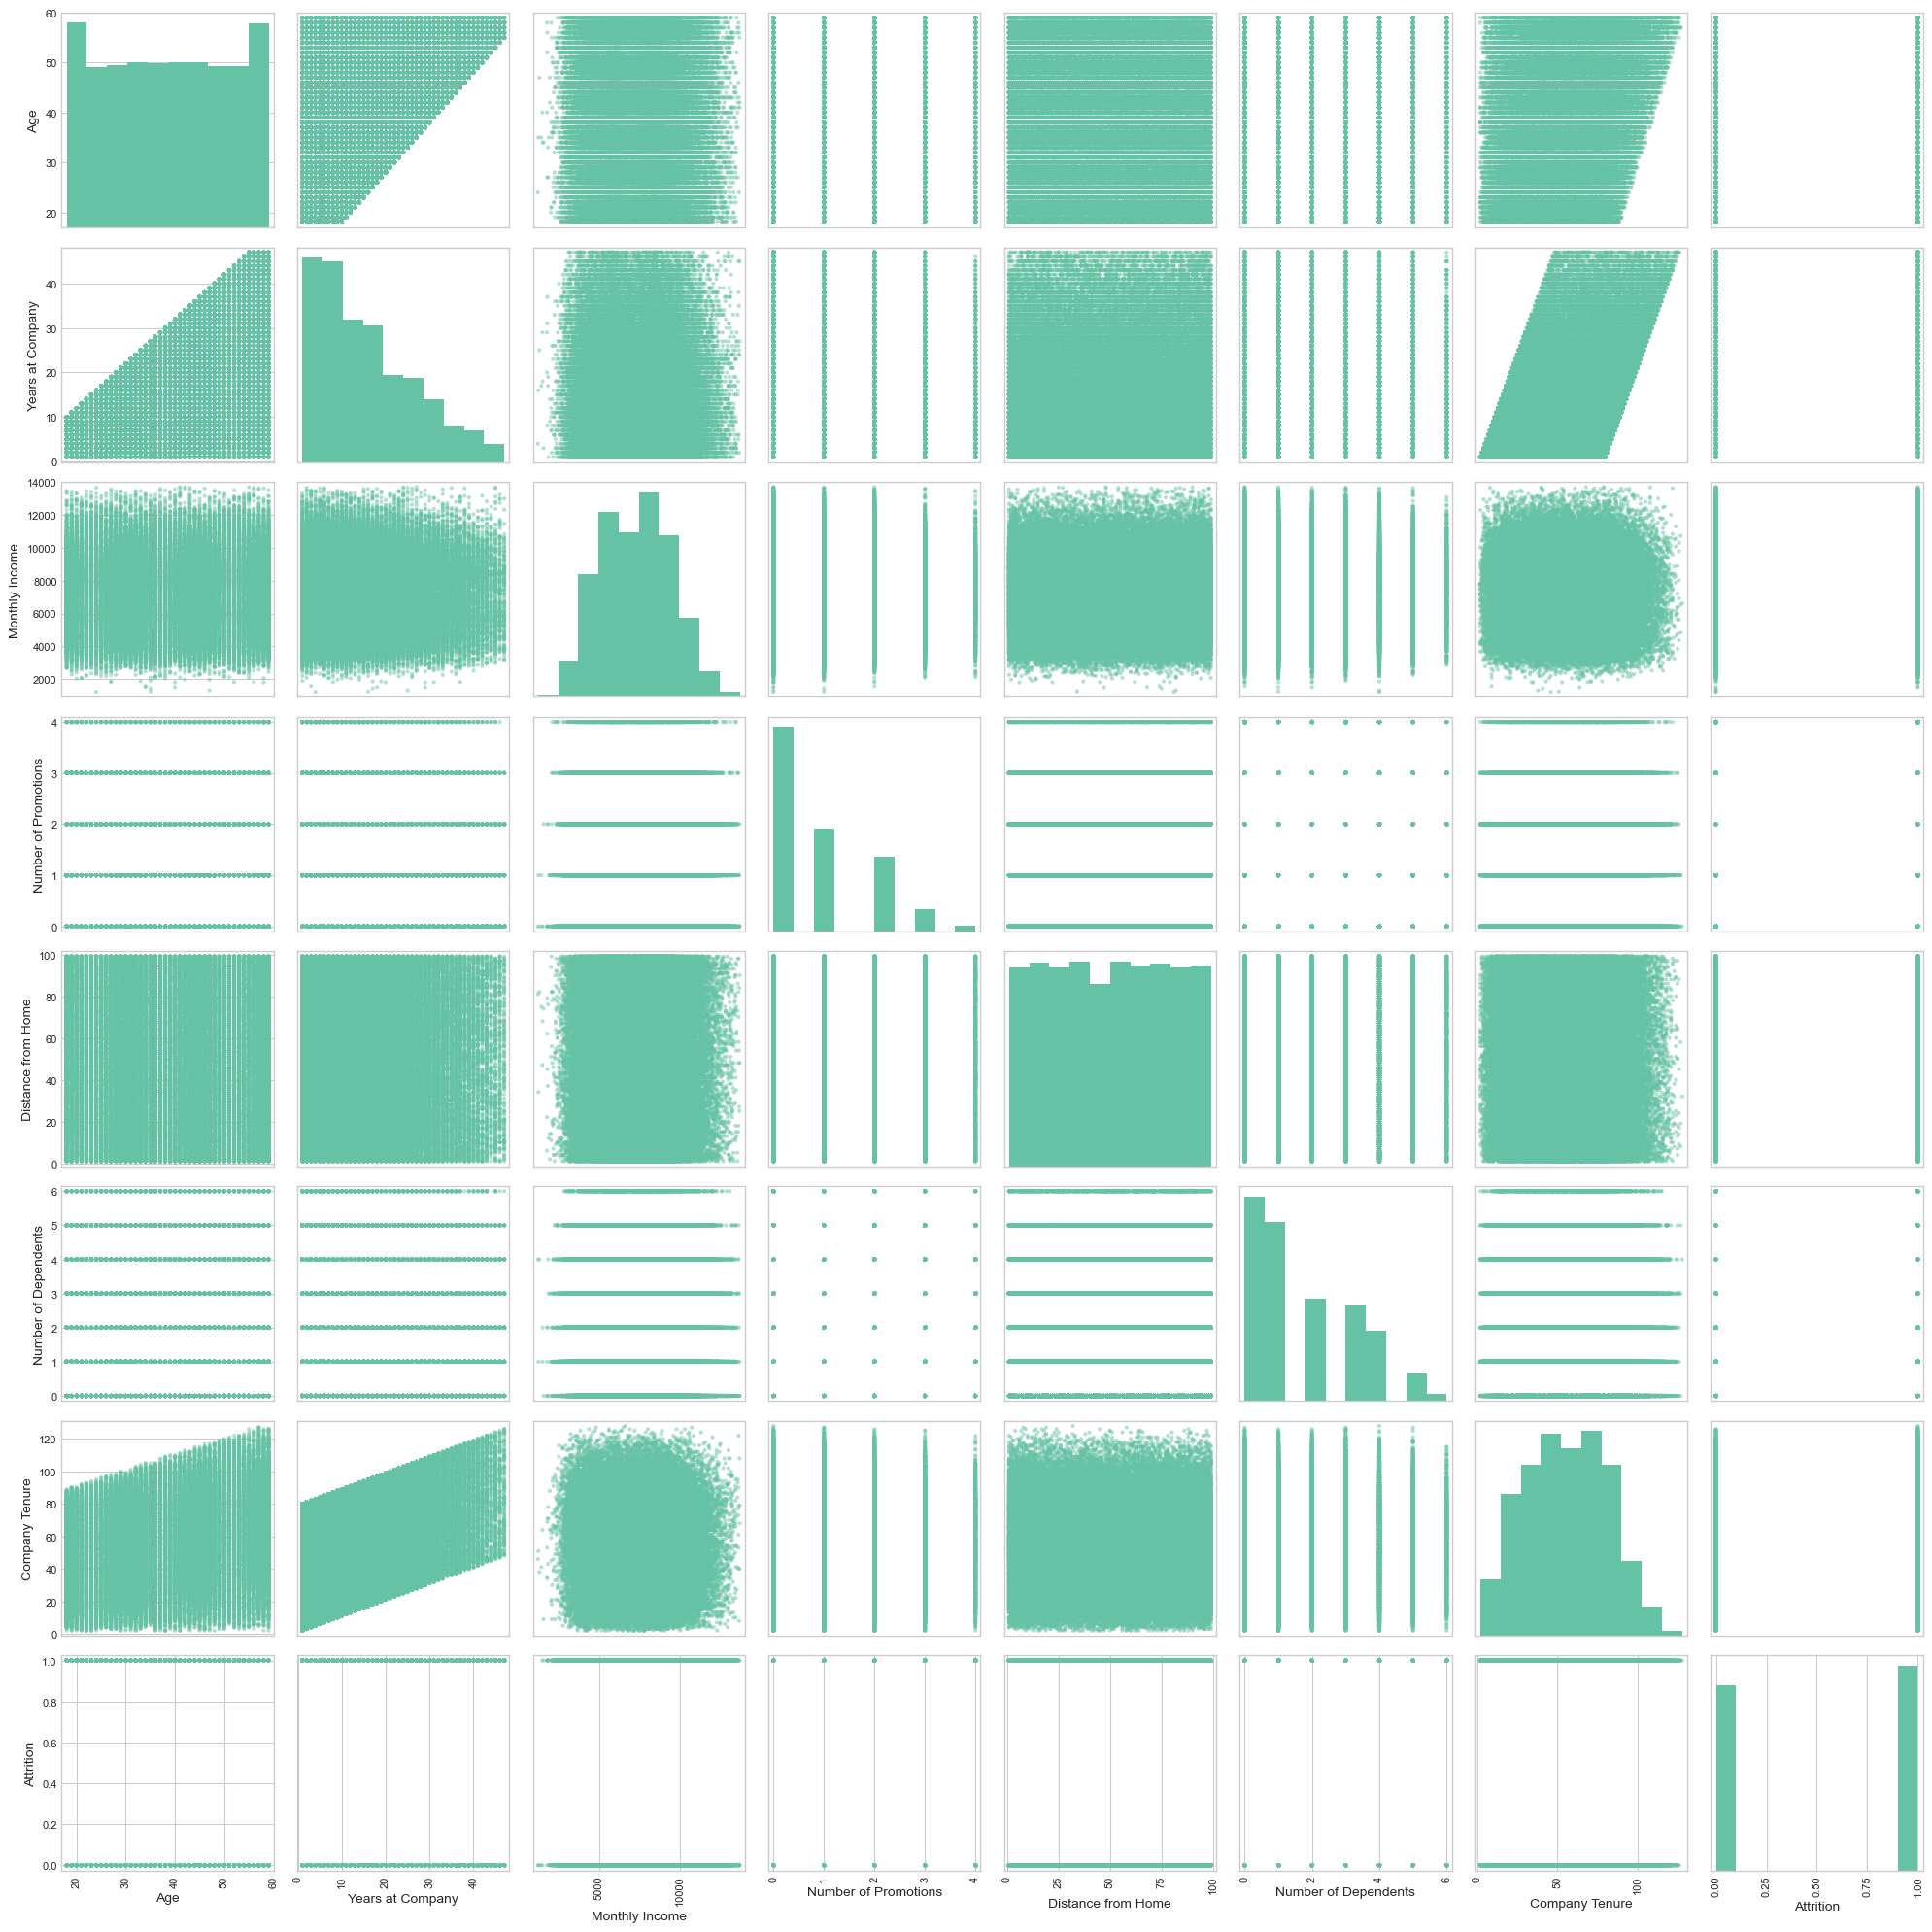

In [95]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
attrition = enc.fit_transform(Employee['Attrition'])
num_df['Attrition'] = attrition

scatter_matrix(num_df, figsize=(20, 20))
plt.tight_layout()
plt.show()

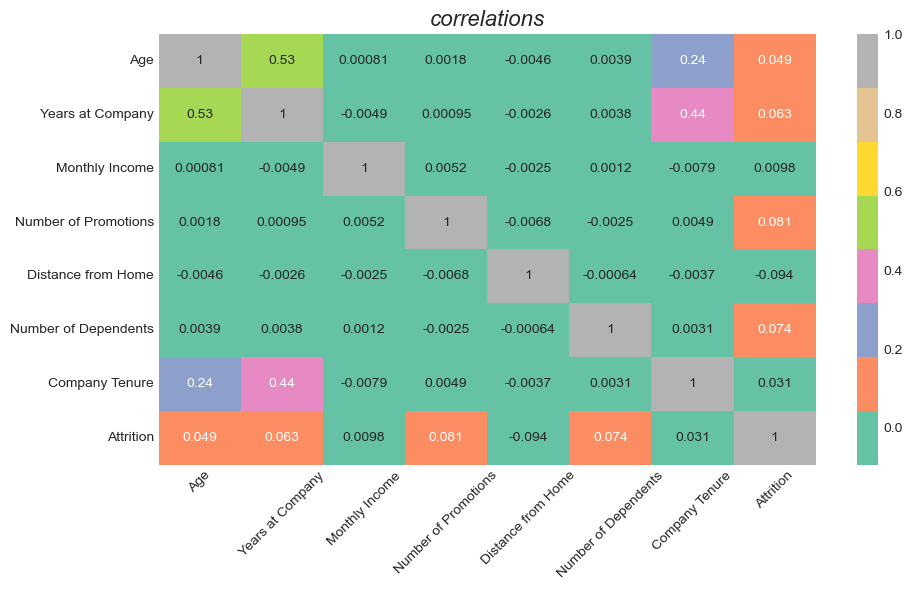

In [96]:

plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(),annot=True, cmap=palette)
plt.title('correlations', style='oblique', fontdict={'size':16})
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preprocessing

In [97]:
from sklearn.model_selection import train_test_split

X = Employee.drop(columns='Attrition')
y = attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X train shape : {X_train.shape}')
print(f'X test shape : {X_test.shape}')
print(f'y train shape : {y_train.shape}')
print(f'y test shape : {y_test.shape}')

X train shape : (59598, 22)
X test shape : (14900, 22)
y train shape : (59598,)
y test shape : (14900,)


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

num_cols = num_df.columns[:-1]
cat_cols = cat_df.columns[:-1]

num_pipeline = Pipeline([
    ('imputer' , KNNImputer(n_neighbors=5)),
    ('scaler' , StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [99]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Modeling

### Logistic Regression implmentation

In [100]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def reg_gradient(X, y, w, lmda):
    m, n = X.shape
    z = w @ X.T
    g = sigmoid(z)
    dz = g - y
    dw = (X.T @ dz)/m + w*(lmda/m)
    return dw

def reg_fit(X, y, w, alpha, lmda, iter):
    m, n = X.shape
    for i in range(iter):
        gradient = reg_gradient(X, y, w, lmda)
        w = w - alpha * gradient
    return w

In [101]:
X_train_ = np.insert(X_train, 0, np.ones(X_train.shape[0]), 1)
X_test_ = np.insert(X_test, 0, np.ones(X_test.shape[0]), 1)

w = np.zeros(X_train_.shape[1])
w = reg_fit(X_train_, y_train, w, 0.1, 5, 10000)


In [102]:
train_pred = np.round(sigmoid(w@X_train_.T))
test_pred = np.round(sigmoid(w@X_test_.T))
print(f'Train Accuracy : {accuracy_score(y_train, train_pred)}')
print(f'Test Accuracy : {accuracy_score(y_test, test_pred)}')

Train Accuracy : 0.7441692674250814
Test Accuracy : 0.7503355704697987


### Logistic Regression

In [103]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_log_reg = grid_search.best_estimator_
print(f"Train Accuracy: {best_log_reg.score(X_train, y_train)}")
print(f"Test Accuracy: {best_log_reg.score(X_test, y_test)}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.744538407329105
Test Accuracy: 0.7503355704697987


### XGboost

In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}


random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_xgb = random_search.best_estimator_
print(f"Train Accuracy: {best_xgb.score(X_train, y_train)}")
print(f"Test Accuracy: {best_xgb.score(X_test, y_test)}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.6}
Train Accuracy: 0.7543541729588241
Test Accuracy: 0.7581879194630873


### RandomForest

In [105]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_dist = {
    'n_estimators': np.arange(100, 1200, 100),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rfc,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_rfc = random_search.best_estimator_
print(f"Train Accuracy: {best_rfc.score(X_train, y_train)}")
print(f"Test Accuracy: {best_rfc.score(X_test, y_test)}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Train Accuracy: 0.8946273364878016
Test Accuracy: 0.7522147651006711


### AdaBoost

In [106]:
from sklearn.ensemble import AdaBoostClassifier

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

random_search = RandomizedSearchCV(
    AdaBoostClassifier(),
    param_distributions=param_dist,
    n_iter=15,
    cv=10,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_ada = random_search.best_estimator_
print(f"Train Accuracy: {best_ada.score(X_train, y_train)}")
print(f"Test Accuracy: {best_ada.score(X_test, y_test)}")


Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 0.5}
Train Accuracy: 0.7516359609382866
Test Accuracy: 0.7583221476510067


### DNN

In [107]:
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)  # Float for BCEWithLogitsLoss

X_val_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)


In [108]:
class Net(nn.Module):
    def __init__(self, ip_size):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(ip_size, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(32, 16)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(16, 1) 
        
    def forward(self, x):
        x = self.fc1(x)

        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)

        x = self.relu2(x)

        
        x = self.fc3(x)

        x = self.relu3(x)
        
        x = self.fc4(x)  
        return x

In [109]:
ip_size = X_train.shape[1]
model = Net(ip_size).to(device)

criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005) 
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.9)

In [110]:
epochs = 500
for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()

    output = model(X_train_tensor).squeeze()  # Shape: [batch_size]

    loss = criterion(output, y_train_tensor)

    loss.backward()
    optimizer.step()
    scheduler.step()

    if (epoch + 1) % 50 == 0 or epoch == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/500], Loss: 0.6929
Epoch [50/500], Loss: 0.6523
Epoch [100/500], Loss: 0.5351
Epoch [150/500], Loss: 0.5137
Epoch [200/500], Loss: 0.5086
Epoch [250/500], Loss: 0.5054
Epoch [300/500], Loss: 0.5036
Epoch [350/500], Loss: 0.5015
Epoch [400/500], Loss: 0.5014
Epoch [450/500], Loss: 0.4999
Epoch [500/500], Loss: 0.4994


In [111]:
with torch.no_grad():
    model.eval()
    output = model(X_val_tensor).squeeze()

    # Apply sigmoid + threshold 0.5
    pred = (torch.sigmoid(output) > 0.5).long()

    acc = accuracy_score(y_val_tensor.cpu(), pred.cpu())
nn_score = acc
print(f'Test Accuracy : {nn_score}')

Test Accuracy : 0.7496644295302013


# Comparing Models

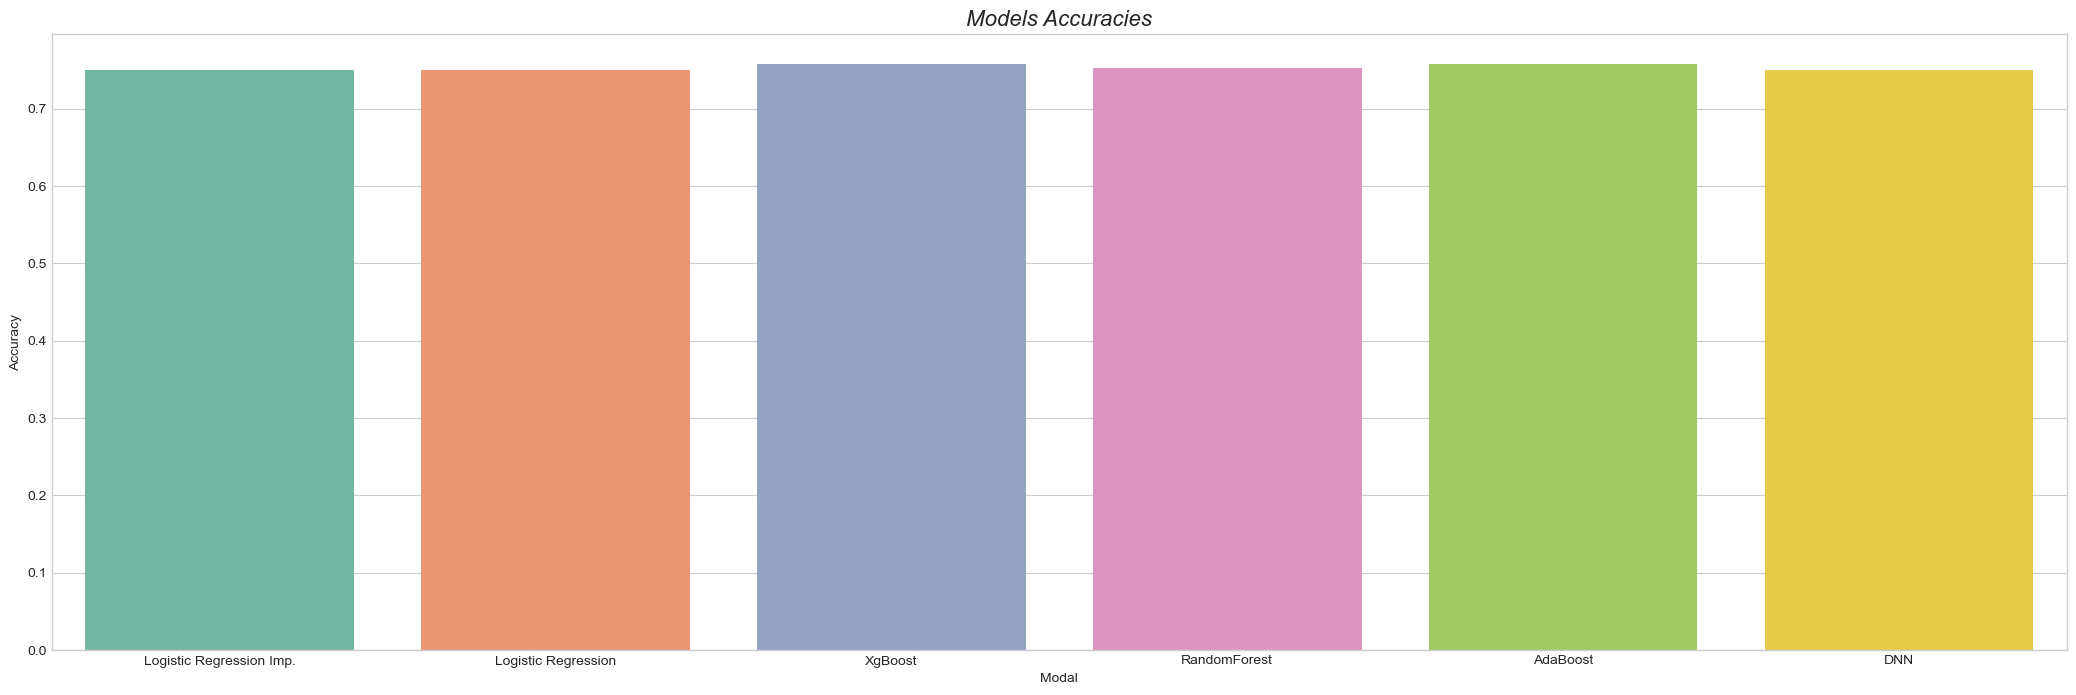

In [121]:
scores = {
    'Logistic Regression Imp.' : accuracy_score(y_test, test_pred),
    'Logistic Regression' : best_log_reg.score(X_test, y_test),
    'XgBoost' : best_xgb.score(X_test, y_test),
    'RandomForest' : best_rfc.score(X_test, y_test),
    'AdaBoost' : best_ada.score(X_test, y_test),
    'DNN' : nn_score
}

plt.figure(figsize=(26, 8))
sns.barplot(scores, palette=palette)
plt.title('Models Accuracies', style='oblique', fontdict={'size':16})
plt.xlabel('Modal')
plt.ylabel('Accuracy')
plt.show()

In [1]:
accs = pd.DataFrame(scores)
accs

NameError: name 'pd' is not defined

# Saving the Model

In [113]:
import joblib
joblib.dump(best_xgb, 'xgb_model.pkl')

['xgb_model.pkl']